# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite

import thinkplot as tplt

Here's a problem from Joyce, "[How probabilities reflect evidence](http://www-personal.umich.edu/~jjoyce/papers/hpre.pdf)":

>Four Urns: Jacob and Emily both start out knowing that the urn U was
randomly chosen from a set of four urns {urn0, urn1, urn2, urn3} where urn_i
contains three balls, i of which are blue and 3-i of which are green. Since the
choice of U was random both subjects assign equal credence to the four
hypotheses about its contents: c(U = urn_i) = 1/4. Moreover, both treat these
hypotheses as statements about the objective chance of drawing a blue ball from
U, so that knowledge of U = urn_i ‘screen offs’ any sampling data in the sense
that c(Bnext |E & U = urn_i) = c(Bnext | U = urni), where Bnext says that the next
ball drawn from the urn will be blue and E is a proposition that describes any
prior series of random draws with replacement from U. Finally, Jacob and
Emily regard random drawing with replacement as an exchangeable process,
so that any series of draws that produces m blue balls and n green balls is as
likely as any other such series, irrespective of order. Use BmGn to denote the
generic event in which m blue balls and n green balls are drawn at random and
with replacement form U. Against this backdrop of shared evidence, suppose
Jacob sees five balls drawn at random and with replacement from U and
observes that all are blue, so his evidence is B5G0. Emily, who sees Jacob’s
evidence, looks at fifteen additional draws of which twelve come up blue, so her
evidence is B17G3. What should Emily and Jacob think about Bnext?

Here's a class that represents a suite of hypotheses about the urns:

In [2]:
class Urns(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: 'B' or 'G'
        hypo: urn index from 0..3
        """
        prob_blue = hypo / 3
        if data == 'B':
            return prob_blue
        else:
            return 1-prob_blue

Here's the uniform prior:

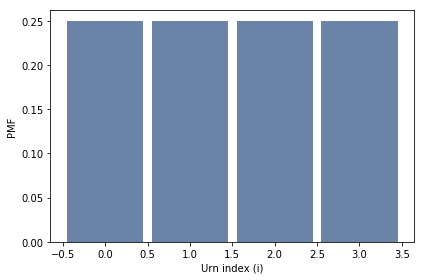

In [3]:
prior = Urns([0, 1, 2, 3])
tplt.Hist(prior)
tplt.decorate(xlabel='Urn index (i)', ylabel='PMF')

Here's Jacob's update after 5 blue marbles.

In [4]:
jacob = prior.Copy()
B5G0 = 'B'*5

for data in B5G0:
    jacob.Update(data)

jacob.Print()

0 0.0
1 0.0036231884057971
2 0.1159420289855072
3 0.8804347826086956


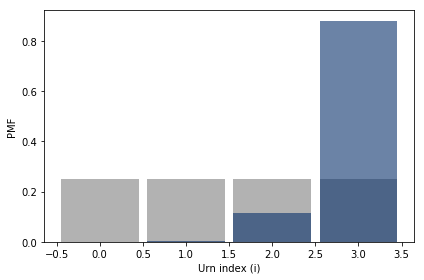

In [5]:
tplt.Hist(prior, color='gray')
tplt.Hist(jacob)
tplt.decorate(xlabel='Urn index (i)', ylabel='PMF')

Here's Emily's update after an additional 12 blue and 3 green.

In [6]:
emily = jacob.Copy()
B12G3 = 'B'*12 + 'G'*3

for data in B12G3:
    emily.Update(data)

emily.Print()

0 0.0
1 6.1031431187061336e-05
2 0.9999389685688129
3 0.0


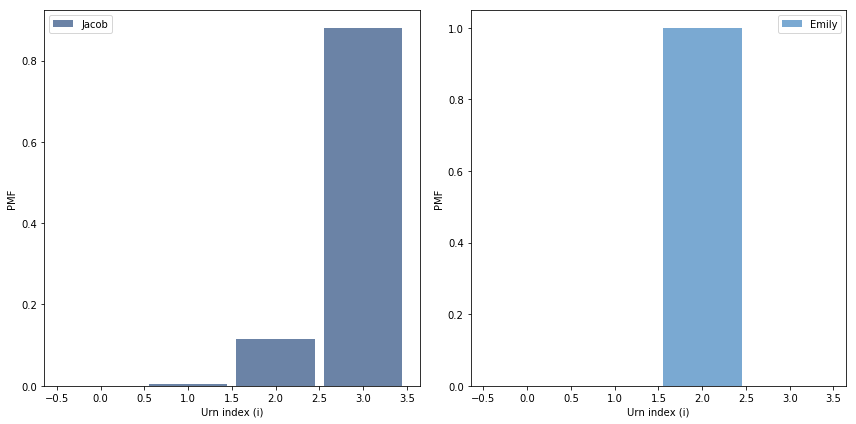

In [7]:
tplt.preplot(cols=2)
tplt.Hist(jacob, label='Jacob')
tplt.decorate(xlabel='Urn index (i)', ylabel='PMF')

tplt.subplot(2)
tplt.Hist(emily, label='Emily')
tplt.decorate(xlabel='Urn index (i)', ylabel='PMF')

What should Jacob believe about Bnext?

In [8]:
total = 0
for i, prob_i in jacob.Items():
    print(i, prob_i)
    prob_blue = i/3
    total += prob_i * prob_blue
    
total

0 0.0
1 0.0036231884057971
2 0.1159420289855072
3 0.8804347826086956


0.9589371980676328

Let's make it a function:

In [9]:
def prob_b_next(suite):
    total = 0
    for i, prob_i in suite.Items():
        prob_blue = i/3
        total += prob_i * prob_blue
    
    return total

Here's what Jacob believes.

In [10]:
prob_b_next(jacob)

0.9589371980676328

And Emily.

In [11]:
prob_b_next(emily)

0.666646322856271

Suppose we draw a **blue** marble from the same urn and show it to Jacob and Emily.  How much do their beliefs about Bnext change?

Here's the effect on Jacob.

In [12]:
print(prob_b_next(jacob))
jacob.Update('B')
print(prob_b_next(jacob))

0.9589371980676328
0.9722921914357681


And on Emily.

In [13]:
print(prob_b_next(emily))
emily.Update('B')
print(prob_b_next(emily))

0.666646322856271
0.6666564944510563


Suppose we draw a **green** marble from the same urn and show it to Jacob and Emily.  How much do their beliefs about Bnext change?

In [14]:
print(prob_b_next(jacob))
jacob.Update('G')
print(prob_b_next(jacob))

0.9722921914357681
0.6565656565656565


In [15]:
print(prob_b_next(emily))
emily.Update('G')
print(prob_b_next(emily))

0.6666564944510563
0.666646322856271
